In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib
import requests
from PIL import Image
import warnings

In [2]:
warnings.filterwarnings(action='once')
simpsons = pd.read_csv(r"...\simpsons_script_lines.csv")

C:\Users\patrick.tawil\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
simpsons.columns.values

array(['id', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms',
       'speaking_line', 'character_id', 'location_id',
       'raw_character_text', 'raw_location_text', 'spoken_words',
       'normalized_text', 'word_count'], dtype=object)

In [4]:
simpsons.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


In [5]:
simpsons.groupby("raw_character_text")["normalized_text"].value_counts()["Miss Hoover"]

normalized_text
yes ralph                                                                                                                                                                                               2
a-minus                                                                                                                                                                                                 1
all right children you may now exchange valentines                                                                                                                                                      1
all the way                                                                                                                                                                                             1
and for the tribute i need a volunteer to present an oral report on principal skinners life                                                                                     

In [6]:
words = simpsons.loc[:,"normalized_text"].str.split(expand = True).stack()
words.head()

0  0          no
   1    actually
   2          it
   3         was
   4           a
dtype: object

In [7]:
words.index = words.index.droplevel(-1)
words.name = "normalized_words"
words.head()

0          no
0    actually
0          it
0         was
0           a
Name: normalized_words, dtype: object

In [8]:
simpsons_temp_df = simpsons.join(words)
simpsons_temp_df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,normalized_words
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,no
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,actually
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,it
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,was
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,a


In [9]:
simpsons_temp_df.columns.values

array(['id', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms',
       'speaking_line', 'character_id', 'location_id',
       'raw_character_text', 'raw_location_text', 'spoken_words',
       'normalized_text', 'word_count', 'normalized_words'], dtype=object)

In [10]:
distinct_words = simpsons_temp_df.groupby(["raw_character_text", "normalized_words"]).size().reset_index(name = "count")
distinct_words.head()

,raw_character_text,normalized_words,count
0,'30s Reporter,burns,1
1,'30s Reporter,for,1
2,'30s Reporter,got,1
3,'30s Reporter,kinda,1
4,'30s Reporter,mr,1


In [11]:
words_total_per_char = distinct_words.groupby("raw_character_text")["count"].agg(["sum"]).sort_values(by="sum", ascending = False)
words_total_per_char.columns = ["Total"]
words_total_per_char.head()

,Total
raw_character_text,
Homer Simpson,271012
Marge Simpson,124698
Bart Simpson,109104
Lisa Simpson,99149
C. Montgomery Burns,36154


C:\Users\patrick.tawil\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2347: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


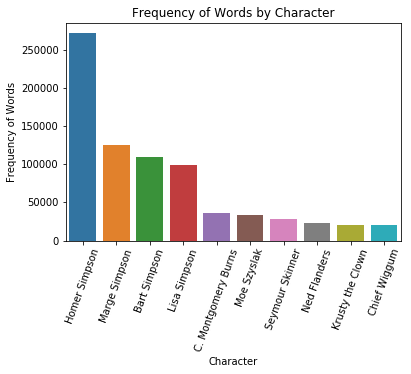

In [12]:
g = sns.barplot(x="raw_character_text", y="Total", data = words_total_per_char.reset_index()[:10])
g.set_xticklabels(labels = words_total_per_char.index[:10], rotation = 70)
g.set_xlabel("Character")
g.set_ylabel("Frequency of Words")
g.set_title("Frequency of Words by Character")
plt.show()

In [13]:
distinct_words.loc[distinct_words["raw_character_text"] == "Homer Simpson"].sort_values(by = "count", ascending = False)[15:20]

,raw_character_text,normalized_words,count
148982,Homer Simpson,oh,2172
144420,Homer Simpson,for,1975
155141,Homer Simpson,what,1891
155654,Homer Simpson,your,1864
147729,Homer Simpson,marge,1807


In [14]:
nonnull = simpsons.loc[:,"normalized_text"].notnull()
nonnull.value_counts()

True     132064
False     26184
Name: normalized_text, dtype: int64

In [15]:
homer_lines = simpsons.loc[:,"raw_character_text"] == "Homer Simpson"
homer_lines.value_counts()

False    128409
True      29839
Name: raw_character_text, dtype: int64

In [16]:
homertext = " ".join(simpsons.loc[nonnull & homer_lines , "normalized_text"].apply(str))
homertext[:20]

'never thrown a party'

In [17]:
stopwords = set(STOPWORDS)
extra_stoplist = ["im", "thats", "ill", "gonna", "wont", "weve", "youre", "ill", "youll", "didnt", "dont", "cant", "us", "one",
                 "two", "us"]

for i in extra_stoplist:
    stopwords.add(i)

In [18]:
mask = np.array(Image.open(requests.get('https://www.punanaamio.fi/media/catalog/product/cache/5/image/9df78eab33525d08d6e5fb8d27136e95/s/m/sm144-homer-simpson-julkkisnaamari.jpg', stream=True).raw))

In [19]:
image_colors = ImageColorGenerator(mask)

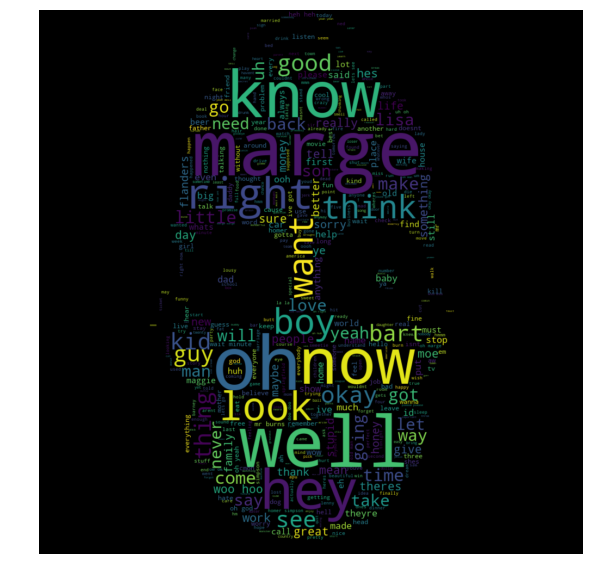

In [20]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 500, mask = mask, width=2000, height=2000)
wordcloud.generate(homertext)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#He doesn't say Doh that often
(simpsons.loc[nonnull & homer_lines , "normalized_text"].str.contains("doh")).value_counts(normalize= True)

False    0.99957
True     0.00043
Name: normalized_text, dtype: float64

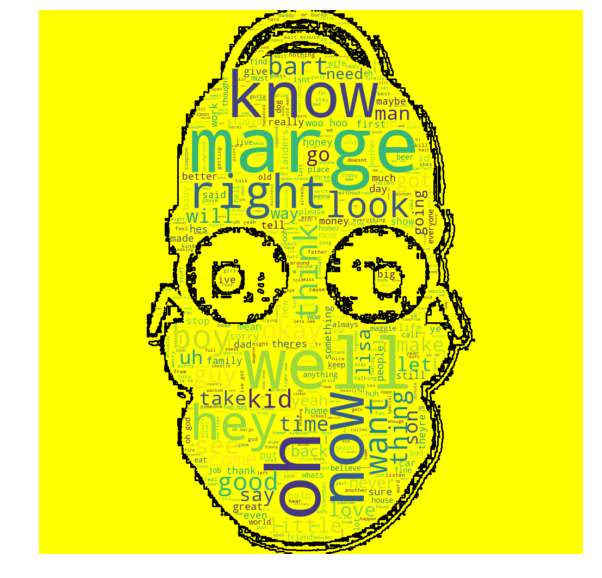

In [22]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 500, mask = mask, width=2000, height=2000, background_color="yellow",
                     contour_width=3, contour_color='black')
wordcloud.generate(homertext)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

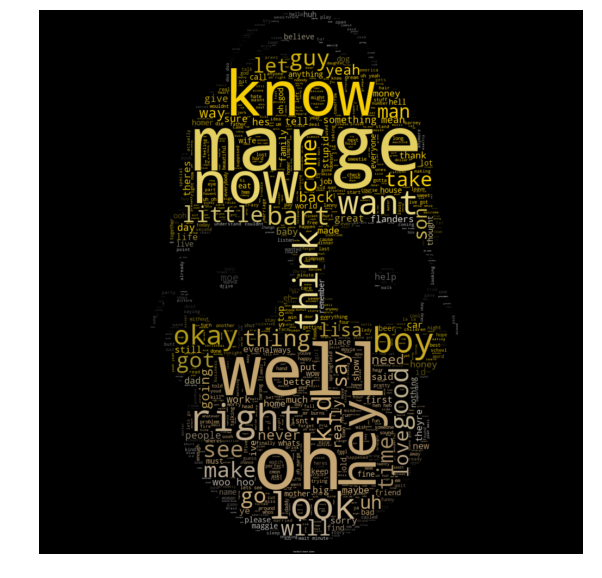

In [23]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 20000, mask = mask, width=2000, height=2000, color_func=image_colors)
wordcloud.generate(homertext)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

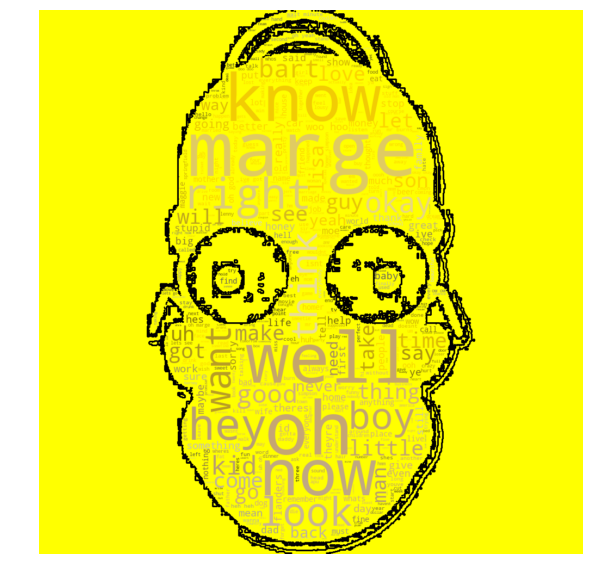

In [24]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 500, mask = mask, width=2000, height=2000, color_func=image_colors,
                      background_color="yellow", contour_width=3, contour_color='black')
wordcloud.generate(homertext)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

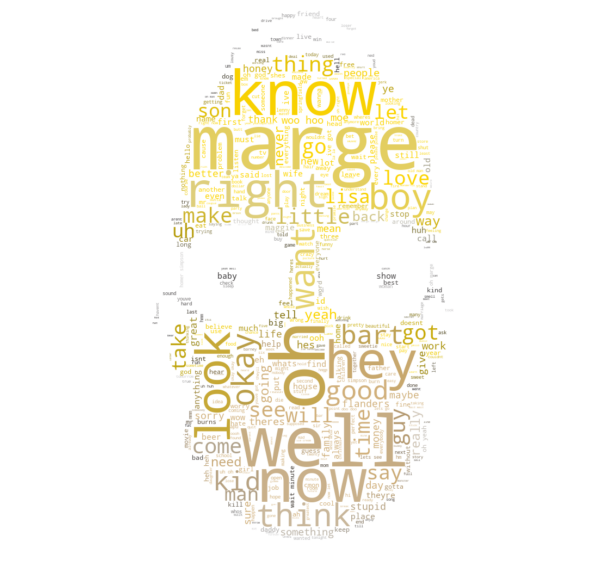

In [25]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 500, mask = mask, width=2000, height=2000, color_func=image_colors,
                     background_color = "white")
wordcloud.generate(homertext)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

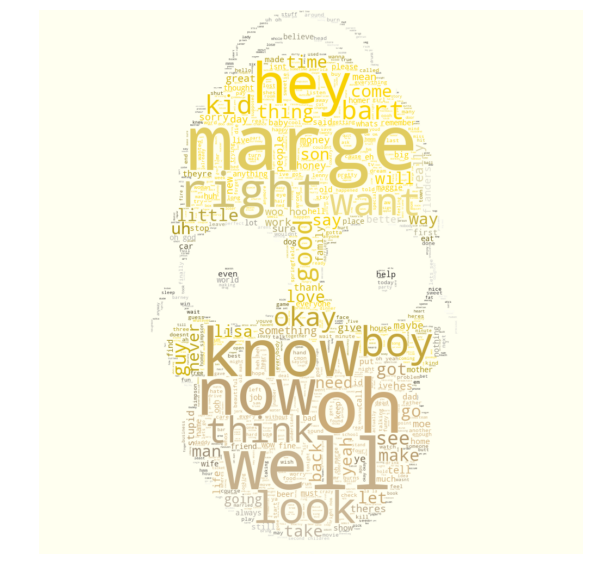

In [26]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 100000, mask = mask, width=2000, height=2000, color_func=image_colors,
                     background_color = "ivory")
wordcloud.generate(homertext)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

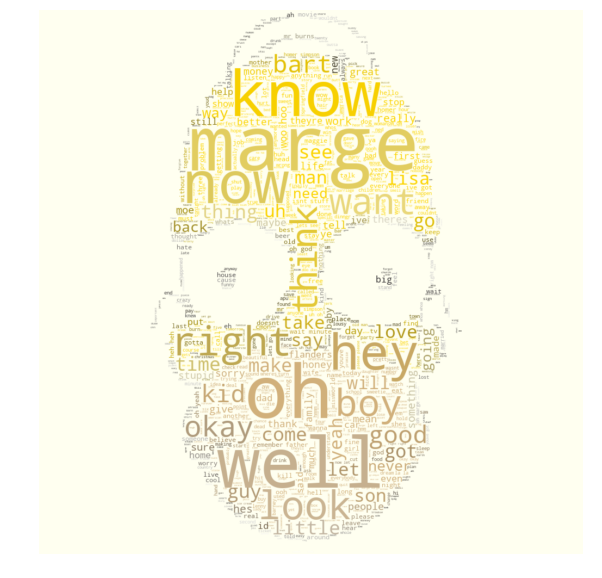

In [27]:
wordcloud = WordCloud(stopwords=stopwords, max_words = 10000, mask = mask, width=2000, height=2000, color_func=image_colors,
                     background_color = "ivory")
wordcloud.generate(homertext)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()